<a href="https://colab.research.google.com/github/LG432/githubTest/blob/main/Numerical_Methods_(Projectiles).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Projectile Motion

In [44]:
class Projectile:
    def __init__(self, initial_velocity, launch_angle, time_step=0.001, gravity=-9.81):
        self.u = initial_velocity
        self.theta = np.radians(launch_angle)  # Convert angle to radians
        self.dt = time_step
        self.g = gravity

        # Decompose initial velocity into x and y components
        self.ux = self.u * np.cos(self.theta)
        self.uy = self.u * np.sin(self.theta)

        # Initial position and time
        self.x = 0
        self.y = 0
        self.t = 0

        # Arrays to store trajectory data
        self.x_array = [self.x]
        self.y_array = [self.y]
        self.t_array = [self.t]

In [45]:
class Euler(Projectile):
    def simulate(self):
        while self.y >= 0:
            # Update position based on current velocity
            self.x += self.ux * self.dt
            self.y += self.uy * self.dt

            # Update velocity in the y direction due to gravity
            self.uy += self.g * self.dt

            # Update time
            self.t += self.dt

            # Store values
            self.x_array.append(self.x)
            self.y_array.append(self.y)
            self.t_array.append(self.t)

# Euler Cromer

class EulerCromer(Projectile):
    def simulate(self):
        while self.y >= 0:
            # Update velocity in the y direction first
            self.uy += self.g * self.dt

            # Update position based on the updated velocity
            self.x += self.ux * self.dt
            self.y += self.uy * self.dt

            # Update time
            self.t += self.dt

            # Store values
            self.x_array.append(self.x)
            self.y_array.append(self.y)
            self.t_array.append(self.t)

# RK4

class RK4(Projectile):
    def simulate(self):
        while self.y >= 0:
            # k1 values based on current position and velocity
            k1x = self.ux * self.dt
            k1y = self.uy * self.dt
            l1vx = 0
            l1vy = self.g * self.dt

            # k2 values using midpoint (k1/2)
            k2x = (self.ux + l1vx / 2) * self.dt
            k2y = (self.uy + l1vy / 2) * self.dt
            l2vx = 0
            l2vy = self.g * self.dt

            # k3 values using midpoint (k2/2)
            k3x = (self.ux + l2vx / 2) * self.dt
            k3y = (self.uy + l2vy / 2) * self.dt
            l3vx = 0
            l3vy = self.g * self.dt

            # k4 values using k3
            k4x = (self.ux + l3vx) * self.dt
            k4y = (self.uy + l3vy) * self.dt
            l4vx = 0
            l4vy = self.g * self.dt

            # Update position and velocity using weighted average of k's and l's
            self.x += (k1x + 2*k2x + 2*k3x + k4x) / 6
            self.y += (k1y + 2*k2y + 2*k3y + k4y) / 6
            self.uy += (l1vy + 2*l2vy + 2*l3vy + l4vy) / 6

            # Update time
            self.t += self.dt

            # Store values
            self.x_array.append(self.x)
            self.y_array.append(self.y)
            self.t_array.append(self.t)

# Analytic

class Analytic(Projectile):
  def simulate(self):
    while self.y >= 0:
      self.y = self.uy*self.t + 0.5*self.g*(self.t)**2
      self.x = self.ux*self.t

      self.t += self.dt

      self.x_array.append(self.x)
      self.y_array.append(self.y)
      self.t_array.append(self.t)

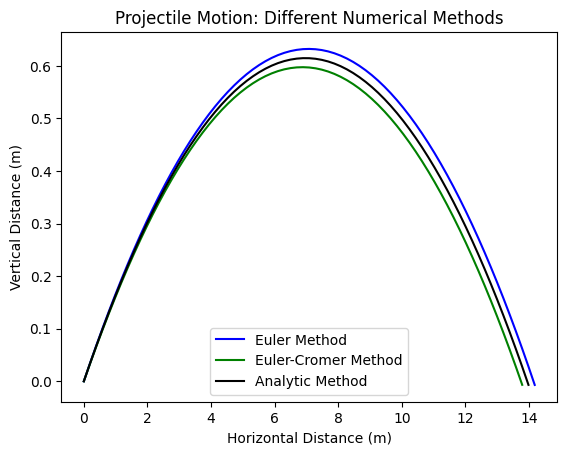

In [50]:
# Plot all trajectories on one plot
def plot_all_trajectories():
    initial_velocity = 20
    launch_angle = 10
    time_step = 0.01

    # Create instances and simulate each method
    euler_projectile = Euler(initial_velocity, launch_angle, time_step)
    euler_projectile.simulate()

    euler_cromer_projectile = EulerCromer(initial_velocity, launch_angle, time_step)
    euler_cromer_projectile.simulate()

    # rk4_projectile = RK4(initial_velocity, launch_angle, time_step)
    # rk4_projectile.simulate()

    analytic_projectile = Analytic(initial_velocity, launch_angle, time_step)
    analytic_projectile.simulate()

    # Plot all results on a single plot
    plt.figure()
    plt.plot(euler_projectile.x_array, euler_projectile.y_array, label="Euler Method", color="blue")
    plt.plot(euler_cromer_projectile.x_array, euler_cromer_projectile.y_array, label="Euler-Cromer Method", color="green")
    # plt.plot(rk4_projectile.x_array, rk4_projectile.y_array, label="RK4 Method", color="red")
    plt.plot(analytic_projectile.x_array, analytic_projectile.y_array, label="Analytic Method", color="black")

    plt.title("Projectile Motion: Different Numerical Methods")
    plt.xlabel("Horizontal Distance (m)")
    plt.ylabel("Vertical Distance (m)")
    plt.legend()
    plt.show()


# Run and plot all methods together
plot_all_trajectories()